# Seed analysis
Here, the data gathered for the inspecting the model's sensitivity to stochastics will be analyzed.

In [1]:
import pandas as pd
import os
from model.enums import BeliefUpdate
from dmdu.utils_dmdu import make_sure_path_exists, calculate_quantiles

In [2]:
# Parameters
considered_quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
# belief_update_fns = [BeliefUpdate.SIT]  # TODO: When data for all bufns: delete this line


# 1. Quantile Data // calculate it and save it

In [3]:
# Quantile Data // calculate it and save it
for belief_update_fn in list(BeliefUpdate):  # belief_update_fns:  # TODO: When data for all bufns: belief_update_fns -> list(BeliefUpdate)
    # Loading data
    path = os.path.join(os.getcwd(), 'data', 'seedanalysis', belief_update_fn.name, 'outcomes.csv')
    outcomes = pd.read_csv(path)
    outcomes = outcomes.rename(columns={'Unnamed: 0': 'uncert_sample'})
    outcome_names = [o for o in outcomes.columns if o not in ['uncert_sample', 'seed']]

    for outcome in outcome_names:
        quantile_data = calculate_quantiles(outcomes_data=outcomes, outcome=outcome, quantiles=considered_quantiles)

        # Save resulting data into csv
        dir_path = os.path.join(os.getcwd(), 'data', 'seedanalysis', belief_update_fn.name, 'quantiles')
        make_sure_path_exists(dir_path)
        file_name = str(outcome) + '.csv'
        path = os.path.join(dir_path, file_name)
        quantile_data.to_csv(path)


In [4]:
# TODO: Plotting of the data
# - read-in the right data from the right files
# - combine the data as needed
#       - quartiles: median and interquartile range
#           1 plot per objective, incl. for each bufn median line and interquartile envelope
#       - 10-and-90%ile?

# 2. Plotting

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load data function
def get_data(belief_update_fn, metric):
    """
    Loading and preparing the requested data.
    @param belief_update_fn: BeliefUpdate
    @param metric: string, from ['avg_user_effort', 'engagement', 'free_speech_constraint', 'n_agents_above_belief_threshold', 'polarization_variance']
    @return: pd.Dataframe
    """
    path = os.path.join(os.getcwd(), 'data', 'seedanalysis', belief_update_fn.name, 'quantiles')
    file_name = '/' + metric + '.csv'
    metric_data = pd.read_csv(path + file_name)
    metric_data = metric_data.rename(columns={'Unnamed: 0': 'n_seeds'})

    # add belief_update_fn column?
    metric_data['belief_update_fn'] = belief_update_fn.name

    return metric_data

In [7]:
# Plot quartiles function
def plot_quartiles(data, title=None, y_max=600, fig_size=(10, 7)):  # TODO: CONTINUE HERE
    # only quartile data
    data = data[['n_seeds','0.25', '0.5', '0.75', 'belief_update_fn']]

    # TODO: Decide wrt below attempt of making the y_max programmatic
    # set y-axis max
    # if y_max is None:
        # curr_max = 0
        # for col_name in data.columns:
        #     new_max = data[col_name].max()
        #     print(f'new_max: {type(new_max), new_max} \n '
        #           f'curr_max: {type(curr_max)}')
        #     if not isinstance(new_max, str):  # ugly workaround because at some point, new_max is 'SIT'?!
        #         if new_max > curr_max:
        #             curr_max = new_max
        # y_max = curr_max + (0.1 * curr_max)  # some padding to the top

    # plotting
    sns.set(rc={'figure.figsize': fig_size})
    plt.ylim(0, y_max)

    sns.lineplot(x='n_seeds', y='0.5', data=data, label='median')
    sns.lineplot(x='n_seeds', y='0.25', data=data, label='25% quantile')
    sns.lineplot(x='n_seeds', y='0.75', data=data, label='75% quantile')

    if title:
        plt.title(title, fontsize=20)

    plt.legend(loc=2, bbox_to_anchor=(1,1))

### a) 'avg_user_effort'

In [8]:
metric = 'avg_user_effort'
y_max = 80

# Getting all the data
sample = get_data(belief_update_fn=BeliefUpdate.SAMPLE, metric=metric)
deffuant = get_data(belief_update_fn=BeliefUpdate.DEFFUANT, metric=metric)
sit = get_data(belief_update_fn=BeliefUpdate.SIT, metric=metric)

data_mapping = {'SAMPLE': sample,
                'DEFFUANT': deffuant,
                'SIT (Social Impact Theory)': sit}

In [9]:
def plot_quartiles_metric_bufn_combo(metric, belief_update_fn, data_mapping, y_max=None):

    title = f'{metric}: {belief_update_fn}'
    data = data_mapping[belief_update_fn]

    plot_quartiles(data=data, title=title, y_max=y_max)

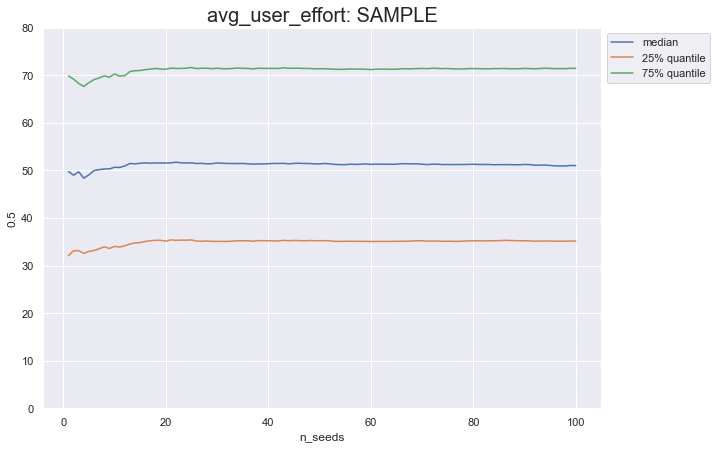

In [10]:
belief_update_fn = 'SAMPLE'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

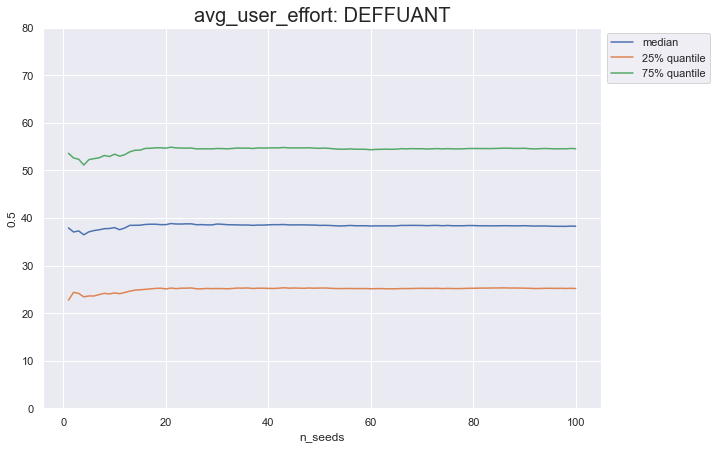

In [11]:
belief_update_fn = 'DEFFUANT'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

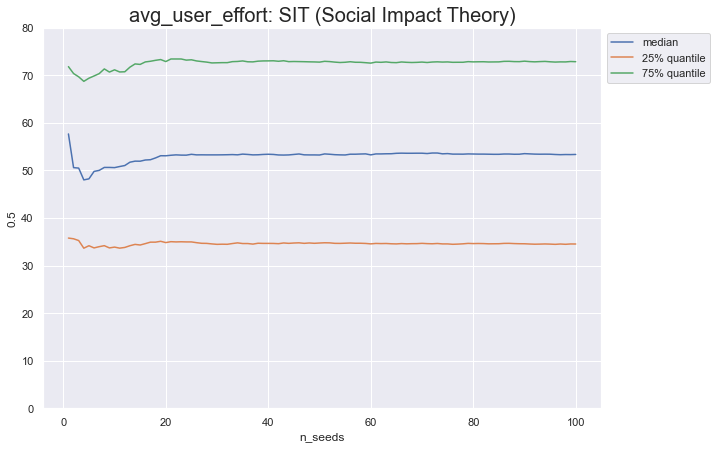

In [12]:
belief_update_fn = 'SIT (Social Impact Theory)'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

### b) 'engagement'

In [13]:
metric = 'engagement'
y_max = 600

# Getting all the data
sample = get_data(belief_update_fn=BeliefUpdate.SAMPLE, metric=metric)
deffuant = get_data(belief_update_fn=BeliefUpdate.DEFFUANT, metric=metric)
sit = get_data(belief_update_fn=BeliefUpdate.SIT, metric=metric)

data_mapping = {'SAMPLE': sample,
                'DEFFUANT': deffuant,
                'SIT (Social Impact Theory)': sit}

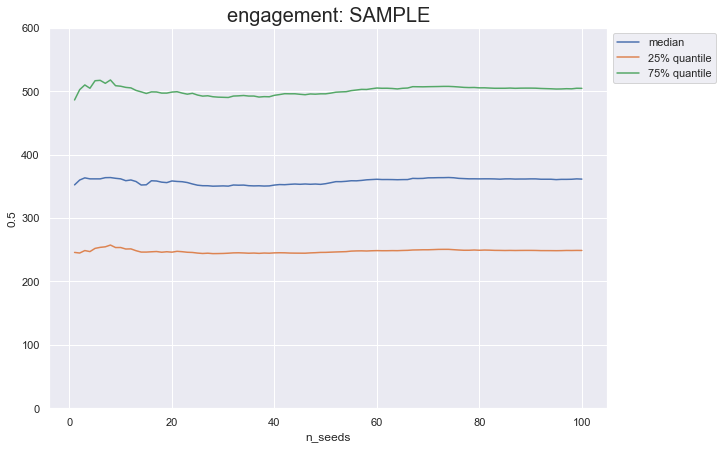

In [14]:
belief_update_fn = 'SAMPLE'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

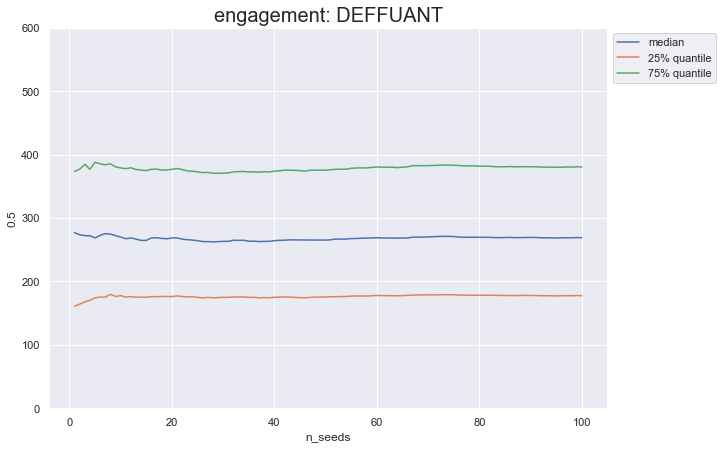

In [15]:
belief_update_fn = 'DEFFUANT'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

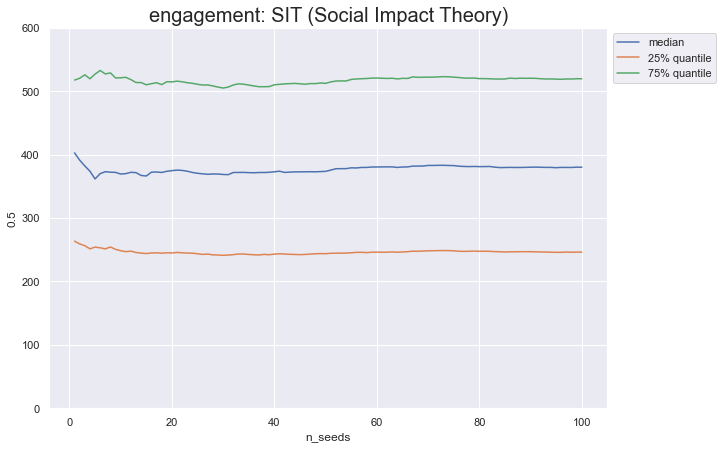

In [16]:
belief_update_fn = 'SIT (Social Impact Theory)'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

### c) 'free_speech_constraint'

In [17]:
metric = 'free_speech_constraint'
y_max = 1

# Getting all the data
sample = get_data(belief_update_fn=BeliefUpdate.SAMPLE, metric=metric)
deffuant = get_data(belief_update_fn=BeliefUpdate.DEFFUANT, metric=metric)
sit = get_data(belief_update_fn=BeliefUpdate.SIT, metric=metric)

data_mapping = {'SAMPLE': sample,
                'DEFFUANT': deffuant,
                'SIT (Social Impact Theory)': sit}

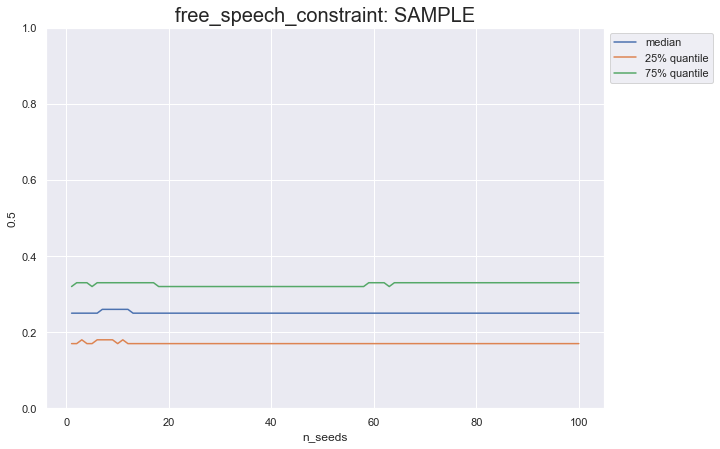

In [18]:
belief_update_fn = 'SAMPLE'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

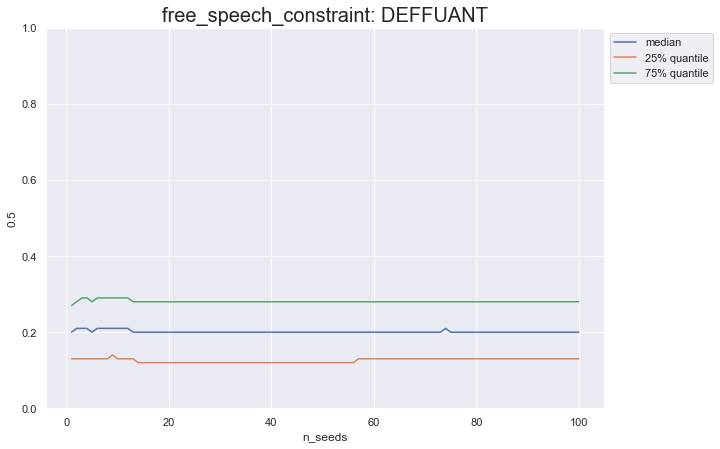

In [19]:
belief_update_fn = 'DEFFUANT'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

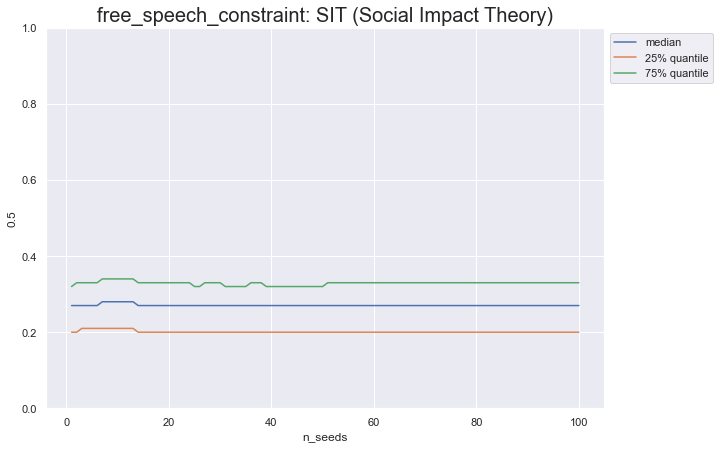

In [20]:
belief_update_fn = 'SIT (Social Impact Theory)'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

### d) 'n_agents_above_belief_threshold'

In [21]:
metric = 'n_agents_above_belief_threshold'
y_max = 1000

# Getting all the data
sample = get_data(belief_update_fn=BeliefUpdate.SAMPLE, metric=metric)
deffuant = get_data(belief_update_fn=BeliefUpdate.DEFFUANT, metric=metric)
sit = get_data(belief_update_fn=BeliefUpdate.SIT, metric=metric)

data_mapping = {'SAMPLE': sample,
                'DEFFUANT': deffuant,
                'SIT (Social Impact Theory)': sit}

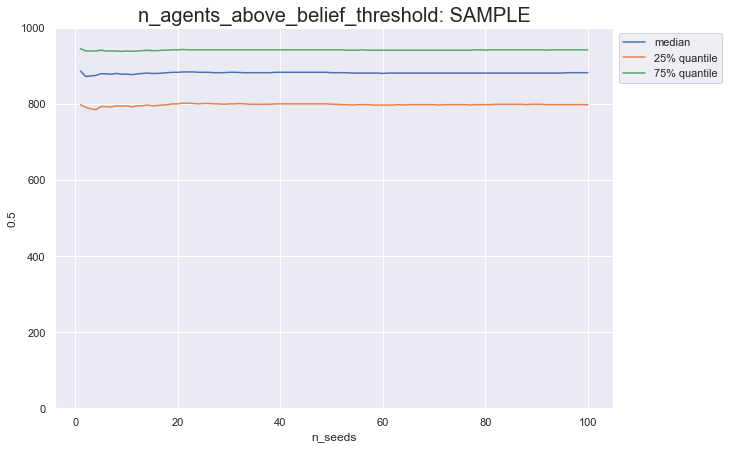

In [22]:
belief_update_fn = 'SAMPLE'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

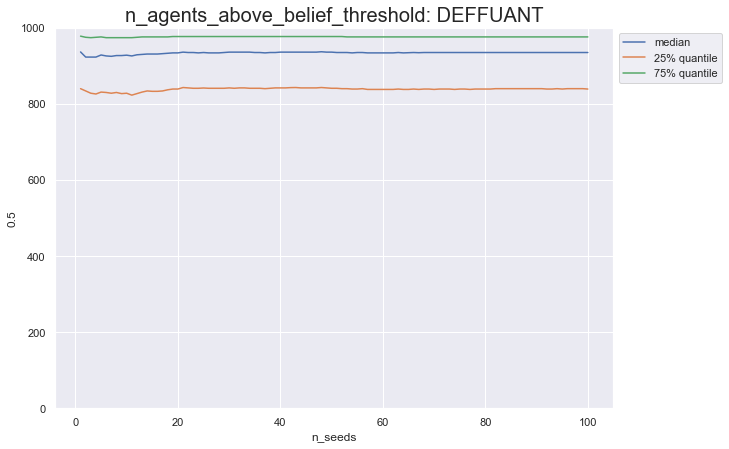

In [23]:
belief_update_fn = 'DEFFUANT'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

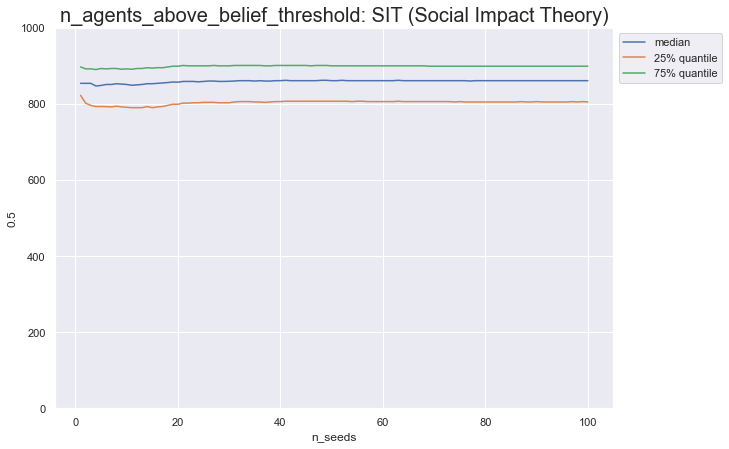

In [24]:
belief_update_fn = 'SIT (Social Impact Theory)'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

### e) 'polarization_variance'

In [29]:
metric = 'polarization_variance'
y_max = 800

# Getting all the data
sample = get_data(belief_update_fn=BeliefUpdate.SAMPLE, metric=metric)
deffuant = get_data(belief_update_fn=BeliefUpdate.DEFFUANT, metric=metric)
sit = get_data(belief_update_fn=BeliefUpdate.SIT, metric=metric)

data_mapping = {'SAMPLE': sample,
                'DEFFUANT': deffuant,
                'SIT (Social Impact Theory)': sit}

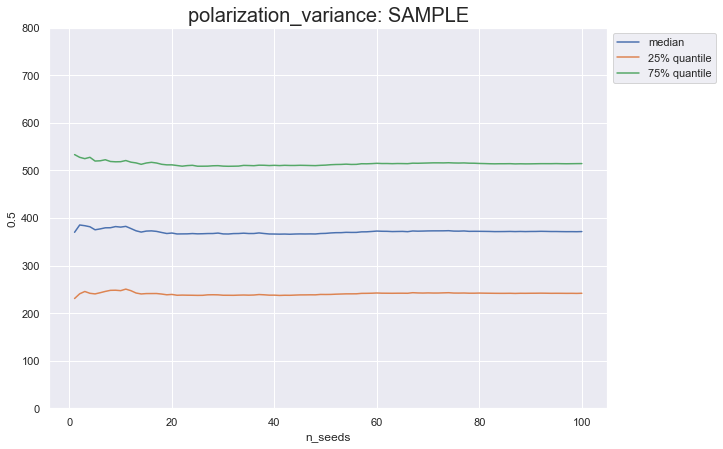

In [30]:
belief_update_fn = 'SAMPLE'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

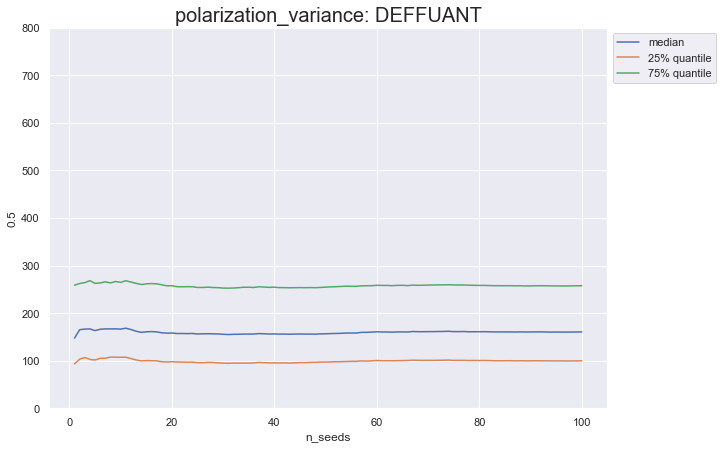

In [31]:
belief_update_fn = 'DEFFUANT'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)

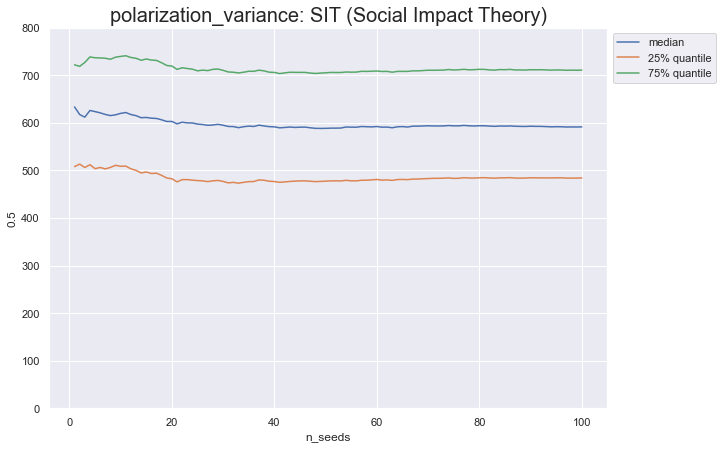

In [32]:
belief_update_fn = 'SIT (Social Impact Theory)'
plot_quartiles_metric_bufn_combo(metric=metric, belief_update_fn=belief_update_fn, data_mapping=data_mapping, y_max=y_max)